In [9]:
from tvDatafeed import TvDatafeed, Interval
import pandas as pd

# Initialize TradingView datafeed
tv = TvDatafeed()

# Download historical data for NIFTY index (NSE)
nifty_data = tv.get_hist(symbol='NIFTY', exchange='NSE', interval=Interval.in_daily, n_bars=1000)

# Print the dataframe
# print(nifty_data)

# Convert to CSV
# nifty_data.to_csv('nifty_data.csv')

In [11]:
nifty_data.head()

,symbol,open,high,low,close,volume
datetime,,,,,,
2021-04-13 09:15:00,NSE:NIFTY,14364.9,14528.90,14274.9,14504.80,588666044.0
2021-04-15 09:15:00,NSE:NIFTY,14522.4,14597.55,14353.2,14581.45,556851200.0
2021-04-16 09:15:00,NSE:NIFTY,14599.6,14697.70,14559.0,14617.85,568568775.0
2021-04-19 09:15:00,NSE:NIFTY,14306.6,14382.30,14191.4,14359.45,503142908.0
2021-04-20 09:15:00,NSE:NIFTY,14526.7,14526.95,14207.3,14296.40,456704721.0


In [17]:
# nifty_data.index=pd.to_datetime(nifty_data.index)
nifty_data['datetime'] = nifty_data.index
nifty_data['datetime'] = pd.to_datetime(nifty_data['datetime'])

In [14]:
nifty_data.set_index('datetime', inplace=True)

In [18]:
nifty_data.head()

,symbol,open,high,low,close,volume,datetime
datetime,,,,,,,
2021-04-13 09:15:00,NSE:NIFTY,14364.9,14528.90,14274.9,14504.80,588666044.0,2021-04-13 09:15:00
2021-04-15 09:15:00,NSE:NIFTY,14522.4,14597.55,14353.2,14581.45,556851200.0,2021-04-15 09:15:00
2021-04-16 09:15:00,NSE:NIFTY,14599.6,14697.70,14559.0,14617.85,568568775.0,2021-04-16 09:15:00
2021-04-19 09:15:00,NSE:NIFTY,14306.6,14382.30,14191.4,14359.45,503142908.0,2021-04-19 09:15:00
2021-04-20 09:15:00,NSE:NIFTY,14526.7,14526.95,14207.3,14296.40,456704721.0,2021-04-20 09:15:00


In [3]:
from tvDatafeed import TvDatafeed,Interval


tv = TvDatafeed()
nifty_data=tv.get_hist('WOCKPHARMA','NSE',interval=Interval.in_5_minute,n_bars=400)

df = nifty_data.copy()
df = df.rename(columns={'open': 'Open', 'high': 'High','low': 'Low', 'close': 'Close','volume': 'Volume', 'high': 'High', })
print(df.tail(2))


d:\py_code_workspace\.venv\Lib\site-packages\tvdatafeed-2.1.0-py3.12.egg\tvDatafeed\main.py:136: SyntaxWarning: invalid escape sequence '\['
d:\py_code_workspace\.venv\Lib\site-packages\tvdatafeed-2.1.0-py3.12.egg\tvDatafeed\main.py:142: SyntaxWarning: invalid escape sequence '\['
d:\py_code_workspace\.venv\Lib\site-packages\tvdatafeed-2.1.0-py3.12.egg\tvDatafeed\main.py:136: SyntaxWarning: invalid escape sequence '\['
d:\py_code_workspace\.venv\Lib\site-packages\tvdatafeed-2.1.0-py3.12.egg\tvDatafeed\main.py:142: SyntaxWarning: invalid escape sequence '\['
you are using nologin method, data you access may be limited


                             symbol    Open    High     Low   Close  Volume
datetime                                                                   
2025-05-02 15:20:00  NSE:WOCKPHARMA  1312.5  1314.0  1310.0  1310.0  3724.0
2025-05-02 15:25:00  NSE:WOCKPHARMA  1309.8  1309.8  1302.1  1304.5  6340.0


In [ ]:


length =48
def check_conditions(df):  
        
    # Calculate average volume and standard deviation for the last 48 periods
    avg_vol = df['Volume'].rolling(window=48).mean()
    std_dev = df['Volume'].rolling(window=48).std()

    # Check conditions
    condition1 = df['Volume'] > (avg_vol + 4 * std_dev)
    condition2 = df['Volume'].rolling(window=2).mean() > (avg_vol + 4 * std_dev)

    # Results
    df['Condition1'] = condition1
    df['Condition2'] = condition2

    support_line   =  0.0
    resistance_line = 0.0
    for index, row in df.iterrows():
        
        # print(row)
        if (row.Condition1 or row.Condition2 ):    
            support_line   =  (row['Low']) if row['Close'] > row['Open'] else support_line
            resistance_line =  (row['High']) if row['Close'] < row['Open'] else resistance_line
            print(f"Alert for {index}: Support Line: {support_line}, Resistance Line: {resistance_line}")



check_conditions(df)
print("DONE")

In [26]:
df.head()

,symbol,Open,High,Low,Close,Volume,Condition1,Condition2
datetime,,,,,,,,
2025-04-16 13:25:00,NSE:WOCKPHARMA,1372.6,1372.7,1366.3,1366.6,1888.0,False,False
2025-04-16 13:30:00,NSE:WOCKPHARMA,1367.1,1369.6,1366.2,1367.5,4588.0,False,False
2025-04-16 13:35:00,NSE:WOCKPHARMA,1367.5,1368.0,1365.9,1366.0,1684.0,False,False
2025-04-16 13:40:00,NSE:WOCKPHARMA,1365.9,1367.4,1362.3,1367.1,7562.0,False,False
2025-04-16 13:45:00,NSE:WOCKPHARMA,1367.3,1372.6,1367.3,1371.1,5232.0,False,False


In [4]:
df.index = pd.to_datetime(df.index)

NameError: name 'pd' is not defined

                             symbol    Open    High     Low   Close  Volume
datetime                                                                   
2025-05-02 15:20:00  NSE:WOCKPHARMA  1312.5  1314.0  1310.0  1310.0  3724.0
2025-05-02 15:25:00  NSE:WOCKPHARMA  1309.8  1309.8  1302.1  1304.5  6340.0
Starting Portfolio Value: 100000.00
Ending Portfolio Value: 99916.00


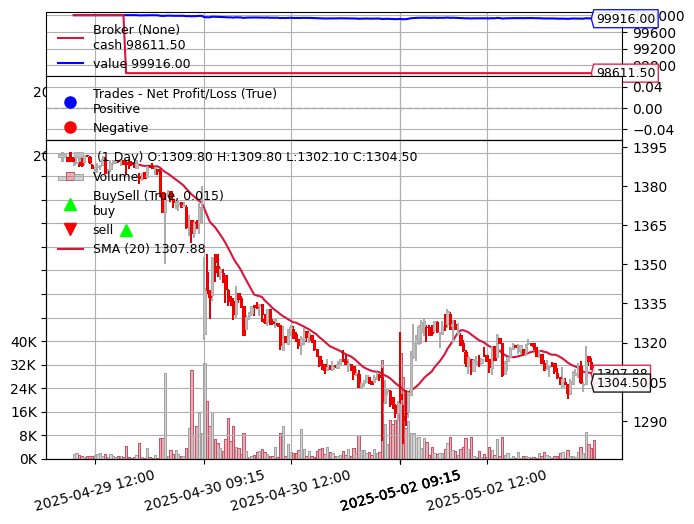

[[<Figure size 640x480 with 4 Axes>]]

In [14]:
%matplotlib inline

from tvDatafeed import TvDatafeed,Interval


tv = TvDatafeed()
nifty_data=tv.get_hist('WOCKPHARMA','NSE',interval=Interval.in_5_minute,n_bars=400)

df = nifty_data.copy()
df = df.rename(columns={'open': 'Open', 'high': 'High','low': 'Low', 'close': 'Close','volume': 'Volume', 'high': 'High', })
print(df.tail(2))


import backtrader as bt
import pandas as pd
import matplotlib.pyplot as plt 
class TestStrategy(bt.Strategy):
    params = (('period', 20),)

    def __init__(self):
        self.sma = bt.indicators.SMA(self.data.close, period=self.p.period)

    def prenext(self):
        # Called before the indicator has enough data
        pass
    
    def next(self):
        # Called when enough data is available
        if self.sma[0] > self.data.close[0]:
            # Your trading logic here
            
            if not self.position: # if not already in the market
                if self.sma[0] > self.data.close[0]:
                    self.buy()  # Buy when SMA crosses above the price
                # self.buy()
            elif self.position and self.sma[0] < self.data.close[0]:
                self.sell()
                
class MyStrategy(bt.Strategy):
    params = (('period', 20),)

    def __init__(self):
        self.sma = bt.indicators.SMA(self.data.close, period=self.p.period)

    def prenext(self):
        # Called before the indicator has enough data
        pass

    def next(self):
        # Called when enough data is available
     
        # Your trading logic here
        if self.data.Condition1[0]  and  self.data.Condition2[0]:
                print("buy")
                self.buy() 
        elif  self.sma[0] > self.data.close[0]:
            self.sell()
        # if not self.position: # if not already in the market
        #      # Buy when SMA crosses above the price
        #     # self.buy()
        # 
        pass

 
cerebro = bt.Cerebro()
data = bt.feeds.PandasData(dataname=df.tail(200))
print(data)
cerebro.adddata(data)
cerebro.addstrategy(TestStrategy)
cerebro.broker.setcash(100000.0)
# cerebro.broker.setcommission(commission=0.002)
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

cerebro.run()
print('Ending Portfolio Value: %.2f' % cerebro.broker.getvalue())

%matplotlib inline
cerebro.plot(iplot=False,style='candlestick')



In [11]:

%matplotlib inline
cerebro.plot( style='candlestick')
# plt.show() 


<IPython.core.display.Javascript object>

[[<Figure size 640x480 with 4 Axes>]]

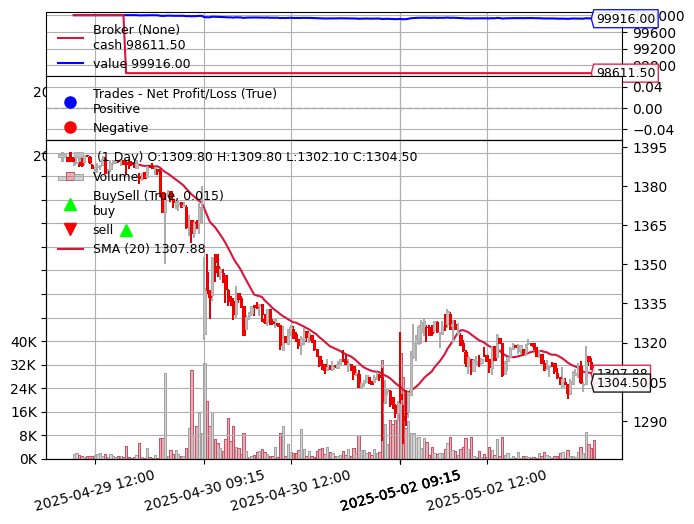

[[<Figure size 640x480 with 4 Axes>]]

In [12]:
%matplotlib inline
cerebro.plot(iplot=False,style='candlestick')


In [6]:
cerebro.plot(iplot=False,style='candlestick')

<IPython.core.display.Javascript object>

[[<Figure size 640x480 with 4 Axes>]]